In [34]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import time
import datetime
from datetime import date
from workalendar.asia import Singapore
from forecastiopy import *
import csv
import numpy as np

In [186]:
trip = pd.read_csv('tripAssignment.csv')

In [187]:
trip.head(10)

,Unnamed: 0,dropOff.stationLocation.latitude,dropOff.stationLocation.longitude,dropOff.dropOffTime,pickUp.pickUpTime,userLocationAtBooking.latitude,userLocationAtBooking.longitude,status,totalDuration,userFoundAt,Region
0,1,1.282104,103.857435,1547360972,1.547361e+09,1.281814,103.857365,COMPLETED,398.0,NaN,MARINABAYSAND
1,2,1.282001,103.857429,1547362886,1.547363e+09,1.282368,103.857584,COMPLETED,0.0,NaN,MARINABAYSAND
2,3,1.282045,103.857376,1547363283,1.547363e+09,1.282001,103.857429,COMPLETED,337.0,NaN,MARINABAYSAND
3,4,1.278547,103.854568,1547129953,1.547124e+09,1.281492,103.857593,COMPLETED,5653.0,NaN,MARINABAYSAND
4,5,1.279860,103.855891,1547130317,1.547130e+09,1.278562,103.854582,COMPLETED,126.0,NaN,DOWNTOWN
5,6,1.281910,103.857371,1547130455,1.547130e+09,1.279742,103.856369,COMPLETED,85.0,NaN,MARINABAYSAND
6,7,NaN,NaN,0,1.547131e+09,1.281901,103.857410,COMPLETED,10800.0,NaN,MARINABAYSAND
7,8,1.300245,103.839913,1545748399,1.545747e+09,1.293740,103.851973,COMPLETED,1627.0,NaN,CITYHALL
8,9,1.298843,103.855937,1545754168,1.545753e+09,1.300522,103.839550,COMPLETED,1357.0,NaN,ORCHARD
9,10,1.282681,103.857614,1548945791,1.548945e+09,1.280833,103.852365,COMPLETED,705.0,NaN,DOWNTOWN


In [188]:
trip = trip.drop(trip.columns[[0]], axis=1)

In [189]:
#understand the data format
trip.info
trip.describe()
trip.dtypes

dropOff.stationLocation.latitude     float64
dropOff.stationLocation.longitude    float64
dropOff.dropOffTime                    int64
pickUp.pickUpTime                    float64
userLocationAtBooking.latitude       float64
userLocationAtBooking.longitude      float64
status                                object
totalDuration                        float64
userFoundAt                          float64
Region                                object
dtype: object

In [190]:
trip.shape

(18507, 10)

In [191]:
trip.columns

Index(['dropOff.stationLocation.latitude', 'dropOff.stationLocation.longitude',
       'dropOff.dropOffTime', 'pickUp.pickUpTime',
       'userLocationAtBooking.latitude', 'userLocationAtBooking.longitude',
       'status', 'totalDuration', 'userFoundAt', 'Region'],
      dtype='object')

In [192]:
#renamethecolumn
trip.columns = ['dropOffLat','dropOffLong','dropOffTime','pickUpTime','pickUpLat','pickUpLong','status','rideDuration','countries','Region']

In [193]:
# Change the pick up time and drop off Time to datetime format
#trip['pickUpTime'] = pd.to_datetime(trip["pickUpTime"],origin='unix')

trip= trip.dropna(subset=['rideDuration'])
trip['pickUpTime1'] = trip['pickUpTime'].apply(lambda x:datetime.datetime.fromtimestamp(x))  
trip['dropOffTime1']=trip.pickUpTime + trip.rideDuration
trip['dropOffTime1'] = trip['dropOffTime1'].apply(lambda x:datetime.datetime.fromtimestamp(x))  


In [194]:
trip['hours'] = trip.pickUpTime1.dt.hour
trip['date'] = trip.pickUpTime1.dt.date
trip['weekday'] = trip.pickUpTime1.dt.weekday_name
#trip['weekday'] = trip['date'].apply(lambda x:time.strftime('%A'))  
trip.head(10)

,dropOffLat,dropOffLong,dropOffTime,pickUpTime,pickUpLat,pickUpLong,status,rideDuration,countries,Region,pickUpTime1,dropOffTime1,hours,date,weekday
0,1.282104,103.857435,1547360972,1.547361e+09,1.281814,103.857365,COMPLETED,398.0,NaN,MARINABAYSAND,2019-01-13 14:22:53.943,2019-01-13 14:29:31.943,14,2019-01-13,Sunday
1,1.282001,103.857429,1547362886,1.547363e+09,1.282368,103.857584,COMPLETED,0.0,NaN,MARINABAYSAND,2019-01-13 15:00:46.391,2019-01-13 15:00:46.391,15,2019-01-13,Sunday
2,1.282045,103.857376,1547363283,1.547363e+09,1.282001,103.857429,COMPLETED,337.0,NaN,MARINABAYSAND,2019-01-13 15:02:25.794,2019-01-13 15:08:02.794,15,2019-01-13,Sunday
3,1.278547,103.854568,1547129953,1.547124e+09,1.281492,103.857593,COMPLETED,5653.0,NaN,MARINABAYSAND,2019-01-10 20:44:59.970,2019-01-10 22:19:12.970,20,2019-01-10,Thursday
4,1.279860,103.855891,1547130317,1.547130e+09,1.278562,103.854582,COMPLETED,126.0,NaN,DOWNTOWN,2019-01-10 22:23:10.764,2019-01-10 22:25:16.764,22,2019-01-10,Thursday
5,1.281910,103.857371,1547130455,1.547130e+09,1.279742,103.856369,COMPLETED,85.0,NaN,MARINABAYSAND,2019-01-10 22:26:09.934,2019-01-10 22:27:34.934,22,2019-01-10,Thursday
6,NaN,NaN,0,1.547131e+09,1.281901,103.857410,COMPLETED,10800.0,NaN,MARINABAYSAND,2019-01-10 22:29:17.920,2019-01-11 01:29:17.920,22,2019-01-10,Thursday
7,1.300245,103.839913,1545748399,1.545747e+09,1.293740,103.851973,COMPLETED,1627.0,NaN,CITYHALL,2018-12-25 22:06:11.822,2018-12-25 22:33:18.822,22,2018-12-25,Tuesday
8,1.298843,103.855937,1545754168,1.545753e+09,1.300522,103.839550,COMPLETED,1357.0,NaN,ORCHARD,2018-12-25 23:46:50.178,2018-12-26 00:09:27.178,23,2018-12-25,Tuesday
9,1.282681,103.857614,1548945791,1.548945e+09,1.280833,103.852365,COMPLETED,705.0,NaN,DOWNTOWN,2019-01-31 22:31:25.170,2019-01-31 22:43:10.170,22,2019-01-31,Thursday


In [195]:
#Add HolidayRow
cal = Singapore()
trip['holiday']=trip['date'].apply(lambda x:cal.is_working_day(x))

In [196]:
trip.head(80)

,dropOffLat,dropOffLong,dropOffTime,pickUpTime,pickUpLat,pickUpLong,status,rideDuration,countries,Region,pickUpTime1,dropOffTime1,hours,date,weekday,holiday
0,1.282104,103.857435,1547360972,1.547361e+09,1.281814,103.857365,COMPLETED,398.0,NaN,MARINABAYSAND,2019-01-13 14:22:53.943,2019-01-13 14:29:31.943,14,2019-01-13,Sunday,False
1,1.282001,103.857429,1547362886,1.547363e+09,1.282368,103.857584,COMPLETED,0.0,NaN,MARINABAYSAND,2019-01-13 15:00:46.391,2019-01-13 15:00:46.391,15,2019-01-13,Sunday,False
2,1.282045,103.857376,1547363283,1.547363e+09,1.282001,103.857429,COMPLETED,337.0,NaN,MARINABAYSAND,2019-01-13 15:02:25.794,2019-01-13 15:08:02.794,15,2019-01-13,Sunday,False
3,1.278547,103.854568,1547129953,1.547124e+09,1.281492,103.857593,COMPLETED,5653.0,NaN,MARINABAYSAND,2019-01-10 20:44:59.970,2019-01-10 22:19:12.970,20,2019-01-10,Thursday,True
4,1.279860,103.855891,1547130317,1.547130e+09,1.278562,103.854582,COMPLETED,126.0,NaN,DOWNTOWN,2019-01-10 22:23:10.764,2019-01-10 22:25:16.764,22,2019-01-10,Thursday,True
5,1.281910,103.857371,1547130455,1.547130e+09,1.279742,103.856369,COMPLETED,85.0,NaN,MARINABAYSAND,2019-01-10 22:26:09.934,2019-01-10 22:27:34.934,22,2019-01-10,Thursday,True
6,NaN,NaN,0,1.547131e+09,1.281901,103.857410,COMPLETED,10800.0,NaN,MARINABAYSAND,2019-01-10 22:29:17.920,2019-01-11 01:29:17.920,22,2019-01-10,Thursday,True
7,1.300245,103.839913,1545748399,1.545747e+09,1.293740,103.851973,COMPLETED,1627.0,NaN,CITYHALL,2018-12-25 22:06:11.822,2018-12-25 22:33:18.822,22,2018-12-25,Tuesday,False
8,1.298843,103.855937,1545754168,1.545753e+09,1.300522,103.839550,COMPLETED,1357.0,NaN,ORCHARD,2018-12-25 23:46:50.178,2018-12-26 00:09:27.178,23,2018-12-25,Tuesday,False
9,1.282681,103.857614,1548945791,1.548945e+09,1.280833,103.852365,COMPLETED,705.0,NaN,DOWNTOWN,2019-01-31 22:31:25.170,2019-01-31 22:43:10.170,22,2019-01-31,Thursday,True


In [275]:
trip1['count']  = trip.groupby(by=['Region','hours','holiday','weekday']).size().mean()

Region      hours  holiday  weekday  
BENCOOLEN   0      False    Saturday           2
                            Sunday             2
                   True     Friday             1
                            Thursday           5
                            Tuesday            2
                            Wednesday          2
            1      False    Saturday           2
                            Sunday             2
                            Tuesday            1
                   True     Friday             1
                            Monday             2
                            Thursday           1
                            Wednesday          3
            2      False    Tuesday            5
                   True     Friday             1
                            Monday             1
                            Thursday           2
                            Tuesday            2
                            Wednesday          1
            3      False    Sat

In [131]:
#Extracted the weather API

weather_data=pd.DataFrame()

for num in range(1543593600,1548950401,86400):
    url = 'https://api.darksky.net/forecast/fbc8e21b5d8fcb8fa08847d1e290514f/1.3591156,103.7353575,'+str(num)
    r = requests.get(url)
    test = r.json()['hourly']['data']
    testFrame = pd.DataFrame(test)
    weather_data=weather_data.append(testFrame,ignore_index=True)


In [132]:
weather_data.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipType,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,87.42,0.75,76.99,0.89,partly-cloudy-night,rain,Humid and Mostly Cloudy,80.50,1543593600,0,6.22,330.0,NaN,3.36
1,87.42,0.75,76.99,0.89,partly-cloudy-night,rain,Humid and Mostly Cloudy,80.50,1543597200,0,6.22,303.0,NaN,4.13
2,87.42,0.75,76.99,0.89,partly-cloudy-night,rain,Humid and Mostly Cloudy,80.50,1543600800,0,6.22,315.0,NaN,2.69
3,82.58,0.75,76.99,0.94,partly-cloudy-night,rain,Humid and Mostly Cloudy,78.73,1543604400,0,5.05,320.0,NaN,1.37
4,82.58,0.75,76.99,0.94,partly-cloudy-night,rain,Humid and Mostly Cloudy,78.73,1543608000,0,5.16,281.0,NaN,1.84


In [133]:
weather_data['time'] = weather_data['time'].apply(lambda x:datetime.datetime.fromtimestamp(x))

In [136]:
weather_data.describe()

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,hours
count,1509.000000,1505.000000,1509.000000,1509.000000,1509.000000,1509.000000,1506.000000,1461.000000,29.000000,1506.000000,1509.000000
mean,88.309881,0.741017,75.108880,0.802319,82.120265,1.596421,6.125113,119.849418,24.576552,5.994369,11.498343
std,6.490215,0.042135,1.530318,0.104929,3.824546,2.296234,0.393830,133.479558,4.193383,3.661942,6.931229
min,76.890000,0.440000,67.950000,0.490000,75.250000,0.000000,1.900000,0.000000,16.100000,0.000000,0.000000
25%,82.430000,0.750000,74.210000,0.730000,78.730000,0.000000,6.220000,23.000000,21.930000,3.360000,5.000000
50%,87.420000,0.750000,75.180000,0.820000,80.640000,0.000000,6.220000,40.000000,25.280000,5.185000,11.000000
75%,93.530000,0.750000,76.230000,0.890000,85.240000,3.000000,6.220000,284.000000,27.730000,8.112500,18.000000
max,105.710000,0.850000,79.110000,0.980000,93.220000,7.000000,6.220000,359.000000,29.980000,19.550000,23.000000


In [273]:
weather_data['hours'] = weather_data.time.dt.hour
weather_data['date'] = weather_data.time.dt.date

In [274]:
new_trip = pd.merge(trip1, weather_data, on=['date','hours'])
new_trip.head(30)

ValueError: Cannot merge a Series without a name

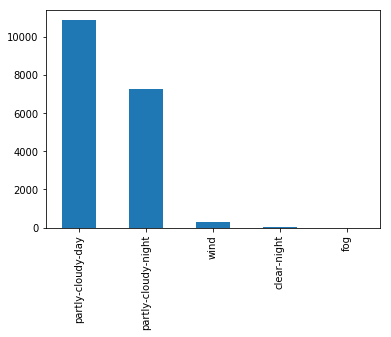

In [269]:
#visualization of the data
new_trip.icon.value_counts().plot(kind='bar')

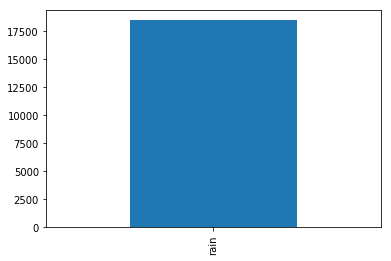

In [258]:
new_trip.precipType.value_counts().plot(kind='bar')

In [270]:
new_trip.columns

Index(['dropOffLat', 'dropOffLong', 'dropOffTime', 'pickUpTime', 'pickUpLat',
       'pickUpLong', 'status', 'rideDuration', 'countries', 'Region',
       'pickUpTime1', 'dropOffTime1', 'hours', 'date', 'weekday', 'holiday',
       'count', 'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'icon', 'precipType', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed'],
      dtype='object')

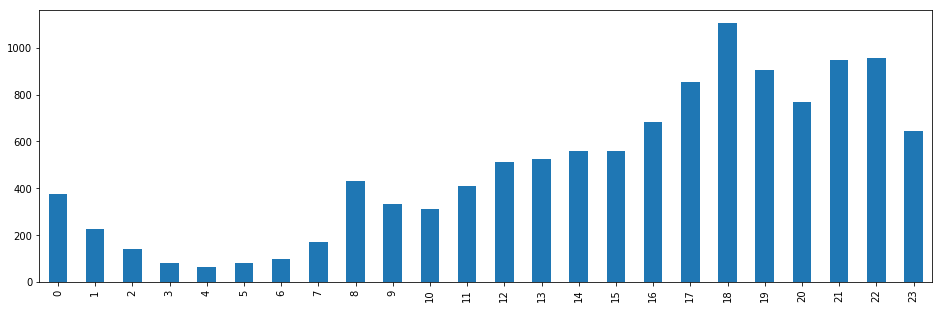

In [257]:
new_trip.loc[new_trip['holiday'] == True].hours.value_counts().sort_index().plot(kind='bar',figsize=(16,5))




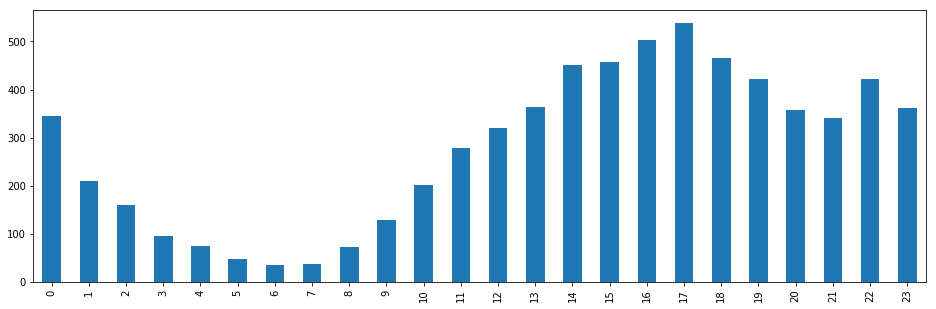

In [253]:
#How holiday affecting it
new_trip.loc[new_trip['holiday'] == False].hours.value_counts().sort_index().plot(kind='bar',figsize=(16,5))


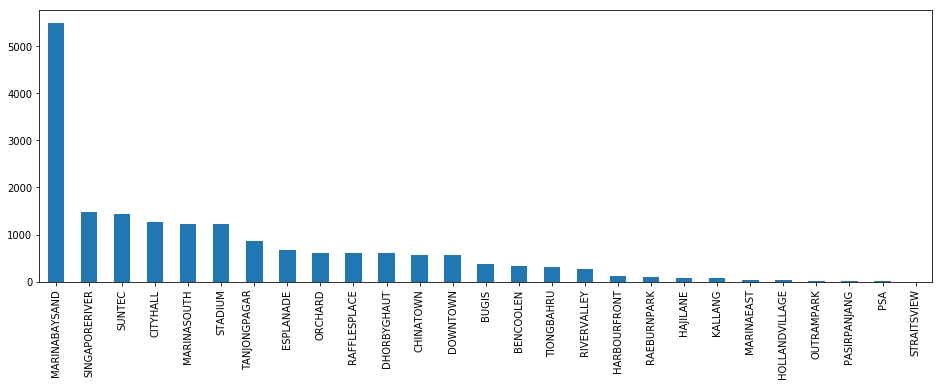

In [271]:
#Getting Region
new_trip.Region.value_counts().plot(kind='bar',figsize=(16,5))


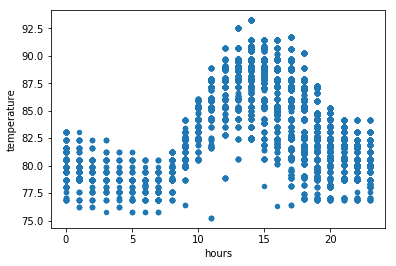

In [156]:
new_trip.plot(kind='scatter', x='hours',y='temperature')



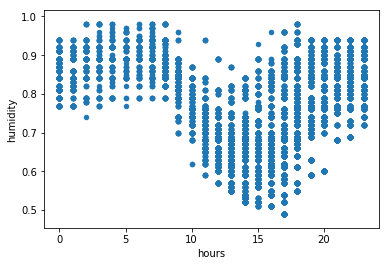

In [157]:
new_trip.plot(kind='scatter', x='hours',y='humidity')

In [49]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
from shapely.geometry import Point

points = trip[['pickUpLat','pickUpLong']]
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
new_trip['Coordinates'] = list(zip(new_trip.pickUpLong,new_trip.pickUpLat))
new_trip['Coordinates'] = new_trip['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(new_trip, geometry='Coordinates')

In [158]:
xmin,ymin,xmax,ymax =  gdf.Coordinates.total_bounds
lenght = 1
wide = 1

cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), wide))
rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), lenght))
rows.reverse()

polygons = []
for x in cols:
    for y in rows:
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-lenght), (x, y-lenght)]) )

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.to_file("grid.shp")

In [159]:
grid

,geometry
0,"POLYGON ((103 1, 104 1, 104 0, 103 0, 103 1))"


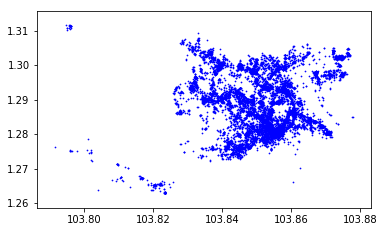

In [148]:
gdf.plot(marker='o', color='b', markersize=0.5)

In [62]:
import shapefile as shp
shp_path = 'MP14_PLNG_AREA_WEB_PL.shp'
sf = shp.Reader(shp_path)

In [171]:
df = read_shapefile(sf)

df.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,coords
0,1,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2014-12-05,28789.7630,37450.8865,13517.121556,7.618921e+06,"[(29772.191399999894, 38311.80470000021), (297..."
1,2,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2014-12-05,19255.4150,37527.6527,15234.223423,1.113326e+07,"[(20294.455199999735, 39114.52789999917), (203..."
2,3,BUKIT MERAH,BM,N,CENTRAL REGION,CR,738B479882E4EE28,2014-12-05,26865.7838,28662.8732,29156.293788,1.446247e+07,"[(26228.631000000052, 30746.197000000626), (26..."
3,4,BUKIT PANJANG,BP,N,WEST REGION,WR,4A9C6E6BAF7BE998,2014-12-05,21287.0436,38761.8448,15891.853279,9.019940e+06,"[(21448.724000000395, 41356.74139999971), (215..."
4,5,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,C893AEAD20F42559,2014-12-05,23256.7643,34689.0037,22492.840844,1.752665e+07,"[(24031.386500000022, 36694.74220000021), (240..."


In [172]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as p  #contains both numpy and pyplot


ValueError: too many values to unpack (expected 2)

,hours,Region,weekday,holiday,temperature,summary,humidity
0,14,MARINABAYSAND,Sunday,False,87.92,Humid and Mostly Cloudy,0.71
1,14,MARINABAYSAND,Sunday,False,87.92,Humid and Mostly Cloudy,0.71
2,14,SINGAPORERIVER,Sunday,False,87.92,Humid and Mostly Cloudy,0.71
3,14,DOWNTOWN,Sunday,False,87.92,Humid and Mostly Cloudy,0.71
4,14,BUGIS,Sunday,False,87.92,Humid and Mostly Cloudy,0.71
